In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from scipy.stats import pearsonr
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

### The aim of this experiment is to perform regression analysis on Boston Housing Dataset without using LinearRegression() method from sklearn library

- The data is taken from [here][d] 
[d]:<https://www.kaggle.com/datasets/willianleite/boston-housing-dataset>

In [12]:
housing = pd.read_csv('Boston.csv')
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Some Information about the dataset
- This is the boston housing dataset. The last variable "MEDV" is the target variable.
 
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's - Target variable.

In [13]:
housing.shape

(506, 15)

In [14]:
target = housing['medv']

# Our target varible

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [16]:

# dropping unnamed: 0 column as it just a serial number and irrelevent to our analysis
housing.drop(['Unnamed: 0'] , axis = 1 , inplace =True)

In [17]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
housing.isnull().sum()
# checking for null values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### There are no null values in our dataset

In [19]:
import seaborn as sns

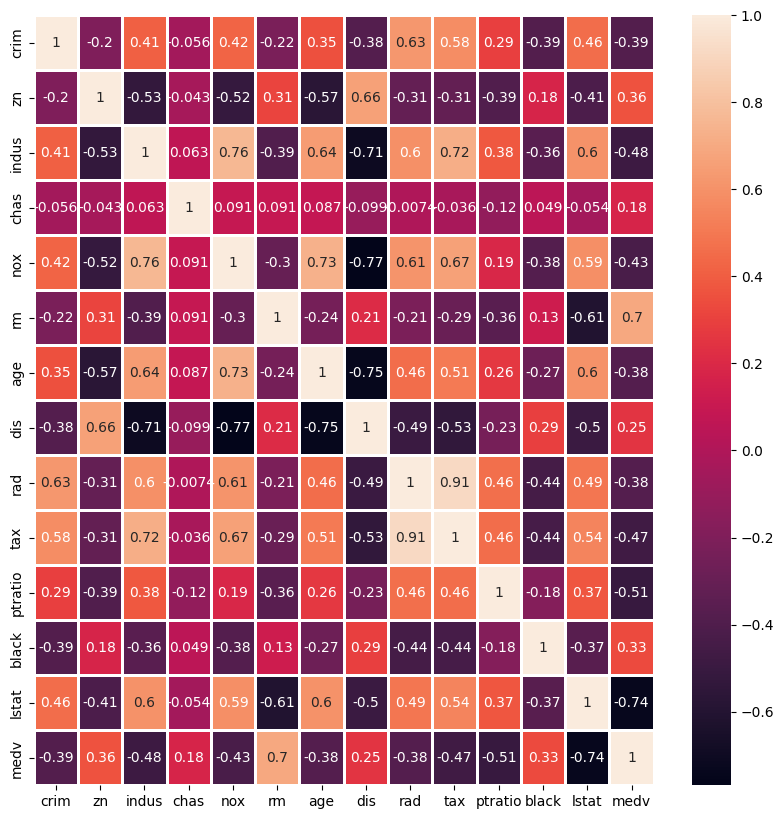

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(housing.corr(), annot=True , linewidths=1);

In [21]:
# sns.pairplot(housing)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


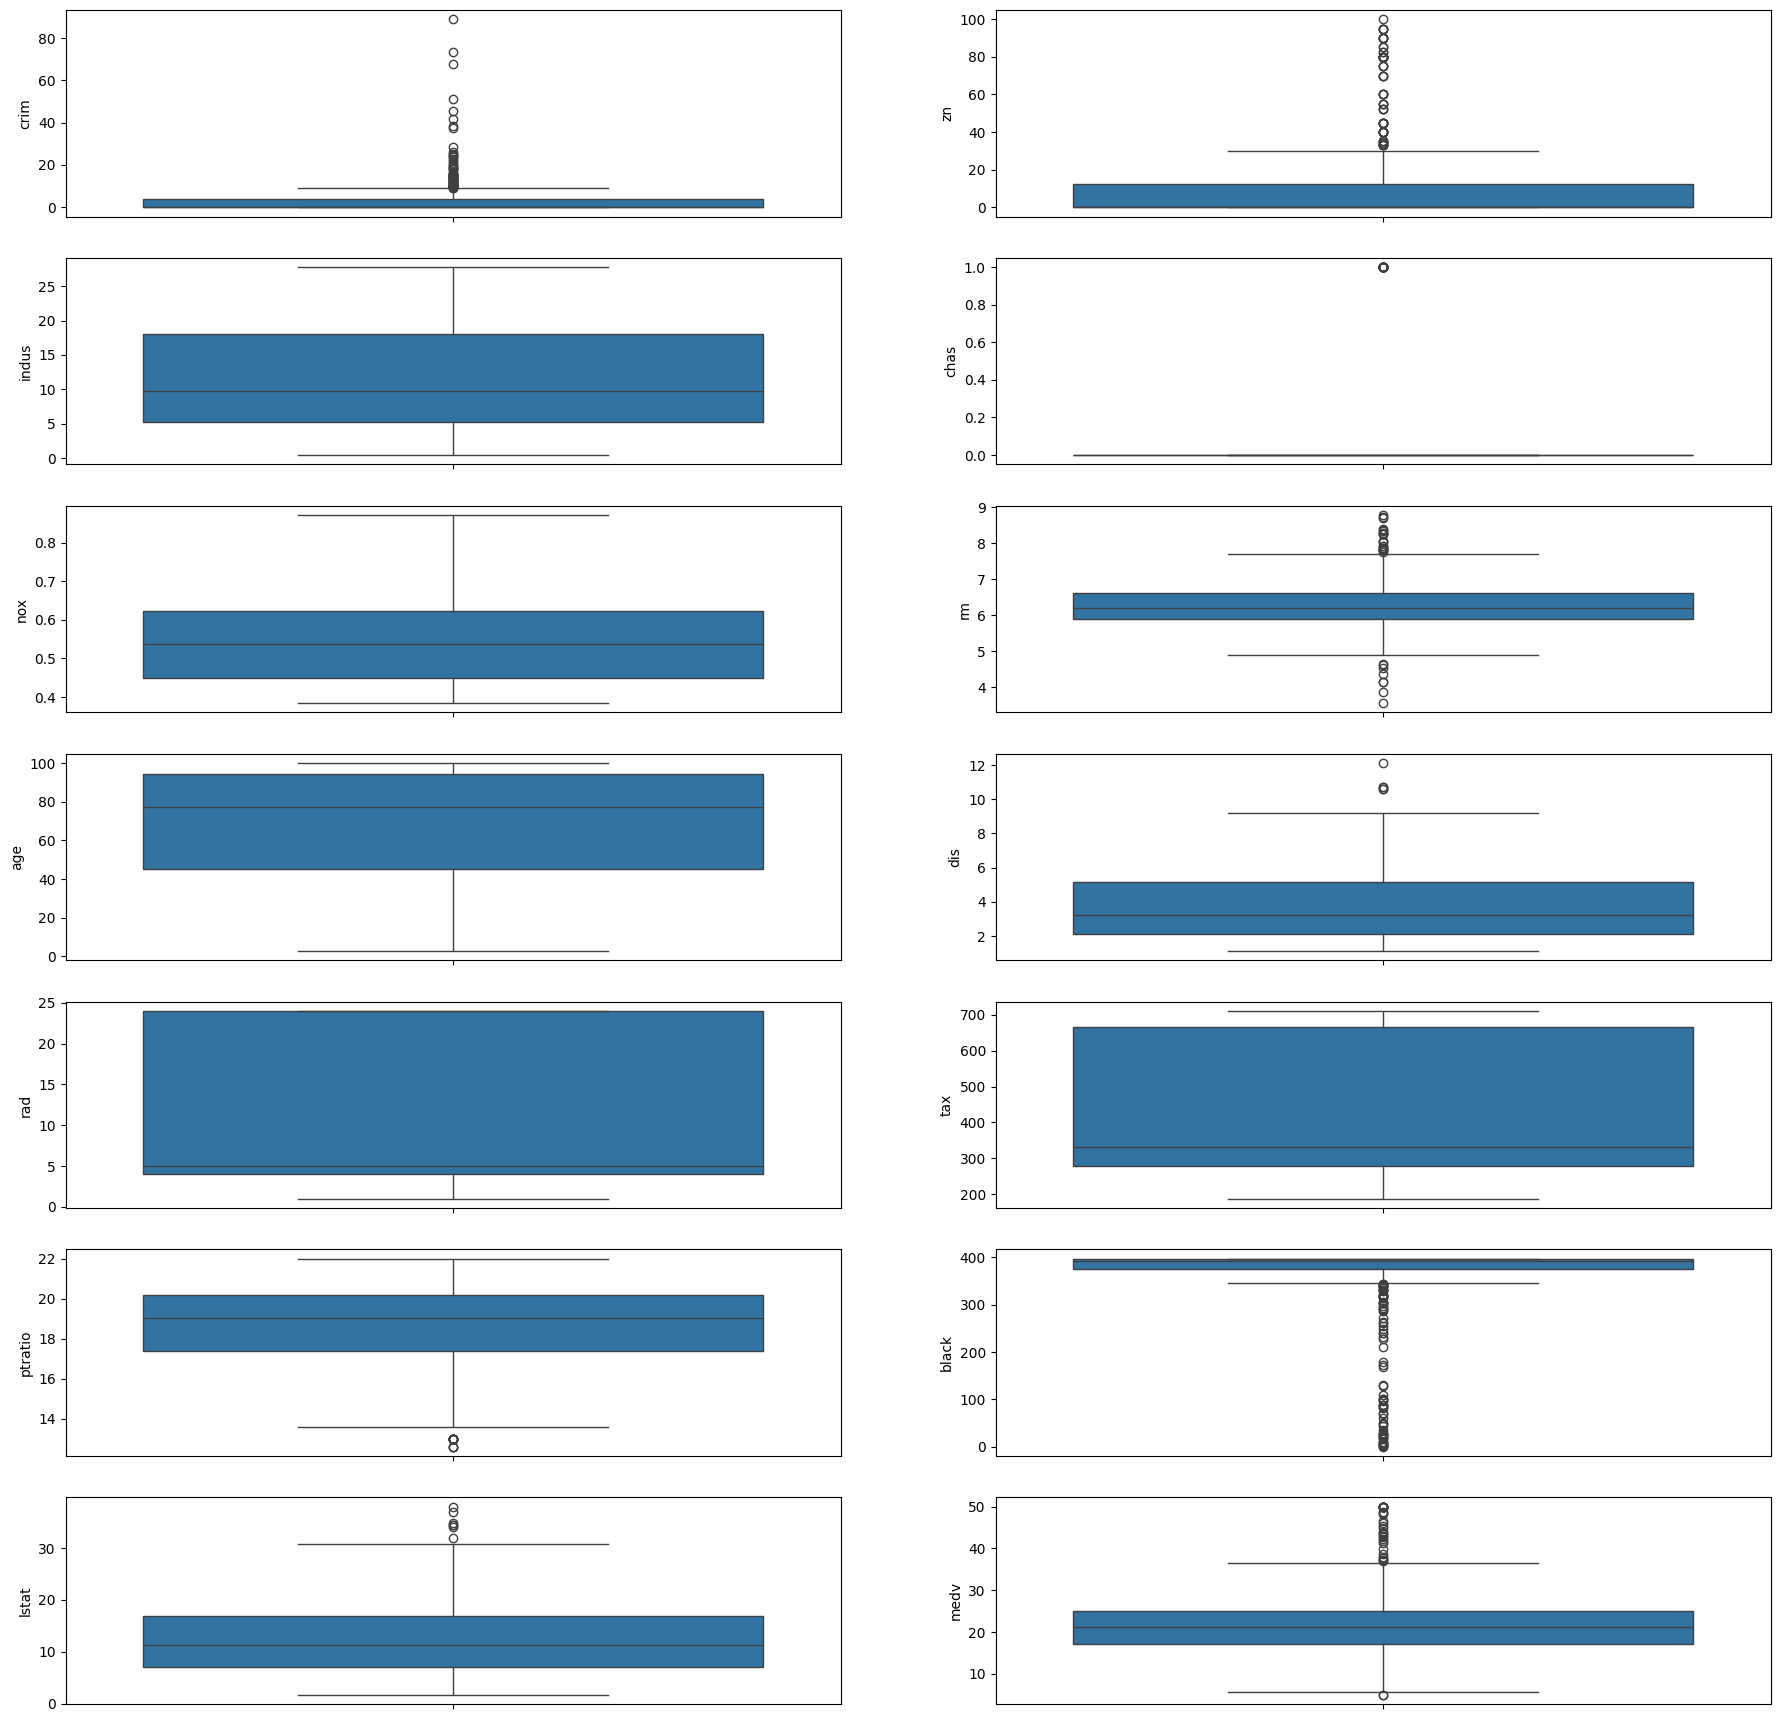

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

<Figure size 1000x2200 with 0 Axes>

In [22]:
cols = housing.columns
print(cols)
nrows = 7
ncols =2
fig, axes = plt.subplots(nrows= nrows,ncols =ncols ,figsize=(22, 22))
 
# Iterating through axes and names
for col, ax in zip(cols, axes.flatten()):

    plt.figure(figsize=(10, 22))
    sns.boxplot(y=col, data=housing, orient='v', ax=ax)
    

In [23]:
 
# plt.figure(figsize=(22, 22))
# nrows = 3
# ncols =3
# fig, axes = plt.subplots(nrows= nrows,ncols =ncols ,figsize=(22, 22))
 
# # Iterating through axes and names
# for col, ax in zip(colsnum, axes.flatten()):
#     sns.violinplot(x=col, y ='medv' ,data=housing,  ax=ax)

<Axes: xlabel='rad', ylabel='medv'>

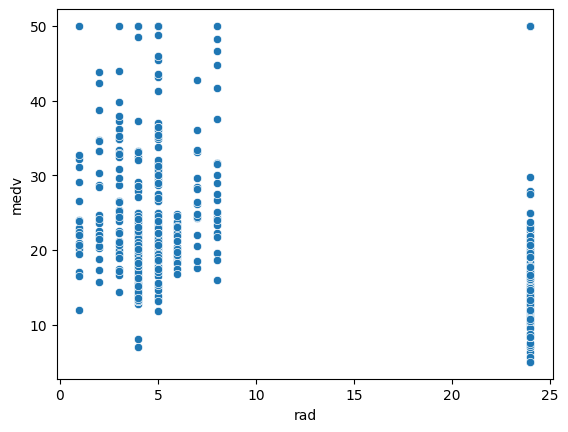

In [24]:
sns.scatterplot(x='rad' ,y='medv', data = housing)

In [25]:
#now checking correlation of each variable with MEDV by pearson method and dropping the one with least correlation with MEDV
for i in housing.columns:
  corr, _ = pearsonr(housing[i], target)
  print(i,round(corr,2))

crim -0.39
zn 0.36
indus -0.48
chas 0.18
nox -0.43
rm 0.7
age -0.38
dis 0.25
rad -0.38
tax -0.47
ptratio -0.51
black 0.33
lstat -0.74
medv 1.0


### Feature Selection

In [26]:
housing.drop( [   'indus', 'chas',   'age', 'dis',   'tax',
       'ptratio', 'black', 'lstat' ], axis =1 , inplace=True)

### Normalizing our Data 

Min-Max Normalization

In [27]:
# Normalizing data set
names = housing.columns
from sklearn.preprocessing import normalize
nr = normalize(housing , axis =1)
housingnr= pd.DataFrame(nr , columns= names)
housingnr.head()

,crim,zn,nox,rm,rad,medv
0,0.000206,0.585689,0.017506,0.213939,0.032538,0.780918
1,0.001207,0.000000,0.020727,0.283768,0.088387,0.954585
2,0.000769,0.000000,0.013213,0.202420,0.056345,0.977587
3,0.000945,0.000000,0.013368,0.204262,0.087566,0.974900
4,0.001865,0.000000,0.012371,0.193040,0.081030,0.977759


In [28]:
housingnr.describe()

,crim,zn,nox,rm,rad,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.102471,0.196230,0.019866,0.215397,0.309836,0.723740
std,0.181707,0.339340,0.009693,0.076248,0.264961,0.246348
min,0.000095,0.000000,0.003862,0.064782,0.009684,0.069026
25%,0.002680,0.000000,0.013054,0.169471,0.118742,0.517270
50%,0.010774,0.000000,0.019853,0.211648,0.205644,0.854741
75%,0.120336,0.412722,0.024388,0.268086,0.425293,0.938667
max,0.956682,0.971609,0.062576,0.556297,0.881889,0.986179


In [29]:
X= housingnr.drop(['medv'] , axis =1)
y = housingnr['medv']
X.shape


(506, 5)

### We will add an extra row of ones in our dataset to (stack it horizontally at the start to represent $X_0$ in the equation for multiple linear regression

In [30]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)


(506, 6)


In [31]:
X[1]

array([1.        , 0.00120693, 0.        , 0.02072687, 0.28376803,
       0.08838749])

## Simple Linear regression ( with one feature )
$y_{pred} = h_o(x) = \theta_0 + \theta_1*x_1 $  where $\theta $ present weight assocaited with each parameter $x$ ,$\theta_0 $ being bias term.

### The error/loss function uses is Mean square error
$$ J(\theta) = \frac {\sum\limits_{x=0}^{n} {{(\mu - x})^2}} {n} $$

### Gradient descent update rule - ( to minimize loss function )

$$ \theta_0 = \theta_0 - { \eta \sum\limits_{i=1}^{m}{(y_{actual} - y_{predicted})^2}}$$

$$ \theta_1 = \theta_1 - { \eta \sum\limits_{i=1}^{m}{(y_{actual} - y_{predicted})^2}}x_1$$
for a particular theta j , where $\eta $ is learing parameter , m the number of observations

## Linear Regression with multiple features

$$y_{pred} = h_0(x) = \theta_0 + \theta_1X_1 + ..... + \theta_nX_N$$ 
where $\theta $ present weight assocaited with each parameter $X$ , $\theta_0 $ being bias term , n the number of parameters. Above can be written as
$$y_{pred} = h_0(x) = \theta_0X_0 + \theta_1X_1 + ..... + \theta_nX_N$$ where $X_0 = 1$ 

### The error/loss function uses is Mean square error
$$ J(\theta) = \frac {\sum\limits_{x=0}^{n} {{(\mu - x})^2}} {n} $$

### Gradient descent update rule - ( to minimize loss function )

$$ \theta = \theta - {\eta \nabla J(\theta) }$$
on differentiation

$$ \theta_j = \theta_j - { \eta \sum\limits_{i=1}^{m}{(y_{actual} - y_{predicted})^2}}X_j$$
for a particular theta j , where $\eta $ is learing parameter , m the number of observations
 

In [32]:
# This block takes longer to run than the vectorized block below

# def hypothesis(x,theta):
#     y_ = 0.0
#     n = x.shape[0]
#     for i in range(n):
#         y_  += (theta[i]*x[i])
#     return y_

# def error(X,y,theta):
#     e = 0.0
#     m = X.shape[0]
#     for i in range(m):
#         y_ = hypothesis(X[i],theta)
#         e += (y[i] - y_)**2
        
#     return e/m

# def gradient(X,y,theta):
#     m,n = X.shape
#     grad = np.zeros((n,))
#     for j in range(n):
#           for i in range(m):
#             y_ = hypothesis(X[i],theta)
#             grad[j] += (y_ - y[i])*X[i][j]
    
#     return grad/m

# def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
#     m,n = X.shape
#     theta = np.zeros((n,))
#     error_list = []
    
#     for i in range(max_epochs):
#         e = error(X,y,theta)
#         error_list.append(e)
        
#         # Gradient Descent
#         grad = gradient(X,y,theta)
#         for j in range(n):
#             theta[j] = theta[j] - learning_rate*grad[j]
        
#     return theta,error_list

# import time
# start = time.time()
# theta,error_list = gradient_descent(X,y)
# end = time.time()
# print("Time taken is ", end-start)

# print(theta)

# print(error_list)

# y_ = []

# for i in range(X.shape[0]):
#     pred = hypothesis(X[i],theta)
#     y_.append(pred)
# y_ = np.array(y_)
# y_

### R squared square

It is also called as coefficient of determination. It tell us what percentage of variability in dependent variable is contributed by the independent variables
 $$R^2 = 1 - \frac{SS_{res}}{SS_{total}}$$
 
 where $$SS_{res} = \sum\limits_{i=1}^{m}{(y_{actual} - {y_{predicted}})^2} $$ is the residual sum of squares
 and  where $$SS_{total} = \sum\limits_{i=1}^{m}{(y_{actual} - {y_{mean}})^2} $$ is the total sum of squares 
, m is the number of observations

In [33]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

# SCORE
# r2_score(y,y_)

### Adjusted R squared square

$$ R^2_{adjusted} = 1 - {\frac {(1 - R^2)(n-1)}{(n-k-1)}}$$
where $ R^2$ is R squared score n is the number of observations and k is the number of parameters

In [34]:
def adj_r2(y,y_):
    r2 = r2_score(y , y_)
    n = X.shape[0]
    print(' The number of observations is ',n)
    k= X.shape[1] -1
    print(' The number of parameters is ',k)
    score = (1-(((n-1)/(n-k-1))*(1-r2)))
    return score

# adj_r2(y,y_)
    

In [35]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m=X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=600):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list
    

In [36]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  0.2745060920715332


### Getting y predited (y hat ) values 

In [37]:
y_ = []

for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)
y_

array([0.70751568, 1.00193294, 0.98183951, 0.96920032, 0.96675839,
       0.96878814, 0.70697791, 0.73343148, 0.64576551, 0.67557519,
       0.64845856, 0.67695252, 0.69647547, 0.94097641, 0.94580536,
       0.93923791, 0.92846792, 0.93982738, 0.92692117, 0.93545854,
       0.91485533, 0.93575675, 0.93022703, 0.93099371, 0.94123138,
       0.93120339, 0.94027729, 0.9378361 , 0.94977541, 0.94401861,
       0.92343773, 0.92438678, 0.91994329, 0.92224574, 0.91540234,
       0.9370331 , 0.93363861, 0.93376328, 0.93185817, 0.48399722,
       0.49491827, 0.9751414 , 0.9681518 , 0.96945046, 0.9750126 ,
       0.97071315, 0.97068412, 0.98350195, 0.97469939, 0.96752798,
       0.59653698, 0.60560025, 0.64133816, 0.62372241, 0.45902396,
       0.47252569, 0.4684623 , 0.45840048, 0.5486043 , 0.52053795,
       0.51055825, 0.49445671, 0.54606127, 0.56856475, 0.73874923,
       0.45987048, 0.4511695 , 0.71380908, 0.67160079, 0.70483128,
       0.95815953, 0.95204098, 0.95413109, 0.95389328, 0.93920

In [38]:
# theta signifies the weights assosiated with each parameter
print(theta)

[ 0.921856   -0.5842945  -0.49465614  0.03097599  0.41516323 -0.42619092]


In [39]:
print(error_list)

[0.5843667801652627, 0.4708591719309656, 0.38273651526585634, 0.31428481005374526, 0.2610766292328232, 0.2196814279977495, 0.18744108117725342, 0.1622959616965819, 0.14265018005032465, 0.12726716710361227, 0.11518876797150603, 0.10567255310880941, 0.09814324473533778, 0.09215508031963922, 0.08736265048034257, 0.08349830316439812, 0.08035463560764888, 0.07777092848813905, 0.07562263462904542, 0.07381323447412333, 0.07226792542177018, 0.07092873209727377, 0.06975071761796842, 0.06869904794644441, 0.0677467172464089, 0.06687278540667174, 0.06606101241102955, 0.06529880019833029, 0.06457637277676471, 0.0638861409459317, 0.0632222100595195, 0.06257999862090526, 0.06195594275601659, 0.06134726722693407, 0.06075180800361783, 0.06016787478469973, 0.05959414447223369, 0.0590295786306786, 0.058473359529724676, 0.05792484058655224, 0.05738350796529315, 0.056848950821501494, 0.056320838245097433, 0.05579890139353924, 0.05528291964658221, 0.05477270987711994, 0.05426811813649065, 0.0537690132106112

In [41]:
#  plotting error value after each iteration

plt.style.use('seaborn')
plt.plot(error_list)
plt.ylabel('error')
plt.xlabel('epochs')
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [42]:
# R SQUARED SCORE
print(f'\n The R squared value is {r2_score(y,y_)} ')


 The R squared value is 0.8985930291570443 


In [43]:
# ADJUSTED R SQUARED SCORE
print(f' \n The adjusted R squared value is {adj_r2(y , y_)}')

 The number of observations is  506
 The number of parameters is  5
 
 The adjusted R squared value is 0.8975789594486148
